<a href="https://colab.research.google.com/github/hzmann/ProjsInAIS26/blob/main/Proj_in_ai_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

**a. Derive the objective function for Logistic Regression using Maximum Likelihood
Estimation (MLE). Do some research on the MAP technique for Logistic Regression,
include your research on how this technique is different from MLE (include citations)**

**Goal:** given n training samples, each training sample i, each feature vector $x_i$, and each label $y_i$ (either 1 or 0),
      find the parameters w and bias b that make the observed labels most likely  

  
**First compute a linear score and apply sigmoid function to map real inputs to probabilities in [0,1]--  
 Score:**
$$
z_i = w^Tx_i + b = \sum_{j=1}^{d}w_jx_{ij} + b
$$  

**Convert score to a probability using the sigmoid function, which maps scores to the interval [0,1] so output can be interpreted as a probability:**
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
**So for each sample i, the model's predicted probability for i is:**
$$p_i = P(y_i = 1 | x_i,w,b) = \sigma(z_i)$$
$$
-->\sigma(w^Tx_i + b)$$
**Probabilities must sum to 1 for a binary outcome, so**
$$ P(y_i = 0 | x_i,w,b) = 1 - p_i $$  
**Since each label $y_i$ is binary, it can be modeled as a Bernoulli random variable with parameter $p_i$--**
**Probability of observing one $y_i$:**
$$ P(y_i | x_i, w, b) = p_i^{y_i}(1-p_i)^{1-y_i} $$
**Assumption: all examples are independent, so likelihood function is:**
$$L(w,b) = \prod_{i=1}^{n}P(y_i | x_i, w, b) = p_i^{y_i}(1-p_i)^(1-y_i)$$
**To choose the parameters that maximize the likelihood, we use (w, b) = argmaxL(w,b)**
**Products are hard to work with so we will turn the product into a sum using log-likelihood:**
$$ \ell(w,b) = \log{L(w,b)}$$
$$--> L(w,b) = \prod_{i=1}^{n}p_i^{y_i}(1-p_i)^{1-y_i}$$
**Take log of both sides:**
$$--> \ell(w,b) = \log(\prod_{i=1}^{n}p_i^{y_i}(1-p_i)^{1-y_i})$$
**Use the rule $\log (\prod_{i=1}^{n}x_i) = \sum_{i=1}^{n} \log(x_i)$:**
$$--> \ell(w,b) = \sum_{i = 1}^{n}(\log(p_i^{y_i}(1-p_i)^{1-yi}))$$
**Use the log rule $log(ab) = loga + logb:$**
$$--> \ell(w,b) = \sum_{i = 1}^{n}(\log(p_i^{y_i}) + \log((1-p_i)^{1-y_i}))$$
**Use the log rule $\log(a^c)$ = $c\log(a)$:**
$$--> \ell(w,b) = y_i\log(p_i) + (1-y_i)\log(1-p_i)$$
with $p_i = σ(w^Tx_i + b)$  

**Turn optimizing into minimizing loss-- minimizing the negative log-likelihood is equivalent to maximizing the log-likelihood:**
$$max\ell(w,b) --> min -l(w,b)$$
**NLL: $N(w,b) = -l(w,b)$**  

# ***Objective function for LR:***
$$N(w,b) = -\sum_{i = 1}^{n} (y_i\log(\sigma(w^Tx_i + b)) + (1-y_i)\log(1-\sigma(w^Tx_i + b)))$$

# MAP (Maximum a Posteriori) technique
- instead of just picking the model that fits the data best, we pick the model that fits the data well and looks reasonable based on assumptions we make about good parameter values before we even see the data
- MLE tells us to choose parameters that make the observed data as likely as possible
  - for datasets that are too small or noisy, that can mean MLE is trying to fit randomness or overfit badly
- MAP incorporates prior beliefs about what parameter values are reasonable (called priors)
  - this tells us very large weights are unlikely, simpler models are more plausible, and parameters should be near zero unless clear evidence of otherwise
- these priors are mathematically encoded as $P(\theta)$
  - they penalize overly complex or extreme models
  - reduces overconfidence by leaning on the priors
  - so MAP = MLE + regularization
- posterior: $P(\theta|D)$
  - how plausible the paramaters are after seeing the data
  - MAP maximizes the posterior
  - $P(\theta|D) = \frac{P(D|\theta)P(\theta)}{P(D)}$, or  $P(\theta|D) ∝ P(D|\theta)P(\theta)$ because P(D) is a constant that does not depend on $\theta$
- thus, MLE works better for large datasets while MAP is the better choice for smaller datasets  

**citations**
- https://stats.stackexchange.com/questions/95898/mle-vs-map-estimation-when-to-use-which#:~:text=Here's%20some%20information%20about%20when%20to%20use,summarize%20the%20posterior%20distribution%20*%20Reparameterization%20invariance
- https://www.geeksforgeeks.org/data-science/mle-vs-map/



**b. Define a machine learning problem you wish to solve using Logistic Regression. Justify
why logistic regression is the best choice and compare it briefly to another linear
classification model**  
  
  The problem I wish to solve with Logistic Regression is the probability an individual has heart disease given health measurement features.

  Logistic Regression is a strong choice here because the problem can clearly be modeled by P(heart disease = 1 | patient features), with risk estimates/probabilities being more useful in healthcare than hard yes or no classifications (we want a probability, not just a label). The heart disease outcome is also naturally binary, with the outcome being the probability of having heart disease vs. not having heart disease which fits the Bernoulli distribution of logistic regression.  

  Other linear models, such as SVM, are not as well suited to this problem. This is because we want to model calibrated probabilities, but instead, SVM learns a boundary that separates the classes with maximal margin; it answers where the line should be drawn so the at-risk and not at-risk groups are farthest apart, not how likely it is for a patient to have heart disease. Also, while two patients may be classified by SVM as being on the same side of that line (say, both at risk of heart disease) one may be at a far greater risk than the other. Class membership gives nothing about risk, and this is an important difference that would be lost.

**c. Discuss how your dataset corresponds to the variables in your equations, highlighting
any assumptions in your derivation from part 1**  

The dataset I have chosen is the Heart Disease Dataset from Kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset.  

In part 1, I used the variables $x_i$ for feature vectors, $y_i$ for labels, w and b for parameters, and $p_i = P(y_i = 1|x_i, w, b)$ for predicted probabilities. There are 13 features: age, sex, cp (chest pain type, 1 of 4 values), trestbps (resting blood pressure), chol (cholesterol in mg), fbs (fasting blood pressure), restecg (resting electrocardiographic results, values 0,1, or 2), thalach (max heart rate achieved), exang (exercise induced angina), oldpeak (ST depression induced by exercise), slope (the slope of the peak exercise ST segment), ca (number of major vessels 0-3 colored by flouroscopy), and thal (0 = normal; 1 = fixed defect; 2 = reversible defect). Each row of the dataset corresponds to one patient, ie, one $i$. Thus, each patient $i$ has feature vector $x_i = x_{i1...13}$. Variable $y_i$ comes from the target column, with values 1 for the patient having heart disease and 0 for not having heart disease. The model parameters w and b will be the learned weight w per feature and bias term b, which will define the linear score $z_i = w^Tx_i + b$. The assumption for the derivation is the model $p_i = P(y_i = 1 | x_i, w, b)$, which in the context of this dataset, means: given a patient's health information, the model predicts the probability that the patient has heart disease.  

Assumptions:  
We assume each $y_i$ is a Bernoulli random variable, which holds up because each $y_i$ in the dataset is either 0 or 1. We also assume training examples are independent, which is true because the diagnoses of each patient is independent of one another. We also assume the log-odds of a prediction is a linear function of its features; however, in real human bodies, biological systems are more complex and may behave in nonlinear ways. Health measurements can vary in inconsistent ways, can interact with one another, and may not affect all patients equally. Despite these disclaimers, this simplifying assumption is often reasonable and effective for logistic regression. Finally, we implicitly assume all values used in the derivation are meaningful, but in this real world dataset, there are some missing values we will have to preprocess.


# Task 2

**a. The dataset I have chosen is the Heart Disease Dataset from Kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset. It has 13 features.

**b. Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among
features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and
demonstrate steps to handle them.***

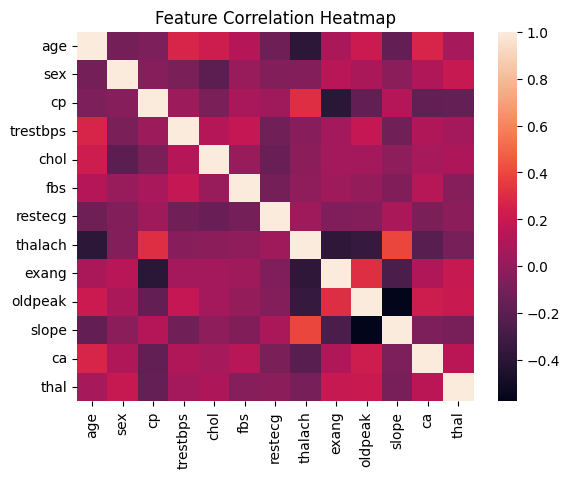


Initial VIF values:


,feature,VIF
0,const,207.966728
10,oldpeak,1.708555
11,slope,1.643092
8,thalach,1.615182
1,age,1.428872
9,exang,1.419047
3,cp,1.293277
12,ca,1.197065
4,trestbps,1.167890
2,sex,1.155948



Done with VIF
Dropped:
[]


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# load dataset
df = pd.read_csv("ProjsInAIS26/heart.csv")

# create features vectors vector, drop true values col
X = df.drop(columns=["target"])

# create true labels vector
y = df["target"]

plt.figure()
# plot correlation heatmap with correlation matrix of X
sns.heatmap(X.corr())
plt.title("Feature Correlation Heatmap")
plt.show()

# VIF: measures how much a feature can be explained by the other features
X_w_const = add_constant(X) # add constant column to features to mirror log regression model
# take one feature at a time, try to predict it using all other features, measure its redundancy:
vif_data = pd.DataFrame()
vif_data["feature"] = X_w_const.columns # fill table with list of columns, including constant, we're computing VIF for
# for each column i, compute its VIF and collect results in
vif_data["VIF"] = [variance_inflation_factor(X_w_const.values, i) for i in range(X_w_const.shape[1])]

print("\nInitial VIF values:")
display(vif_data.sort_values("VIF", ascending=False))
# deciding to use 5 as the cutoff score
cutoff = 5.0
"""
we will look at the highest VIF feature excluding 'const', drop one feature at a time with VIF > cutoff,
recompute VIF, and repeat until no score is above cutoff
"""
dropped = [] # to store features we drop
while True:
  # recompute VIF each time using updated feature set
  X_w_const = add_constant(X)
  vif_data["feature"] = X_w_const.columns
  vif_data["VIF"] = [variance_inflation_factor(X_w_const.values, i) for i in range(X_w_const.shape[1])]

  # get VIF scores, ignoring const row
  vif_no_const = vif_data[vif_data["feature"] != "const"].sort_values("VIF", ascending = False)

  # get feature with highest VIF
  highest_feature = vif_no_const.iloc[0]["feature"]
  highest_vif = vif_no_const.iloc[0]["VIF"]

  # if the highest VIF does not superpass the cutoff, we are done
  if highest_vif <= cutoff:
    break

  # otherwise, add that feature to dropped list and drop it
  print(f"Dropping '{highest_feature}' with score {highest_vif:.2f}")
  dropped.append((highest_feature, float(highest_vif)))
  X = X.drop(columns=[highest_feature])

print("\nDone with VIF")
print("Dropped:")
print(dropped)


**c. Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced
visualization techniques (e.g., pair plots with KDE, heatmaps with clustering)**

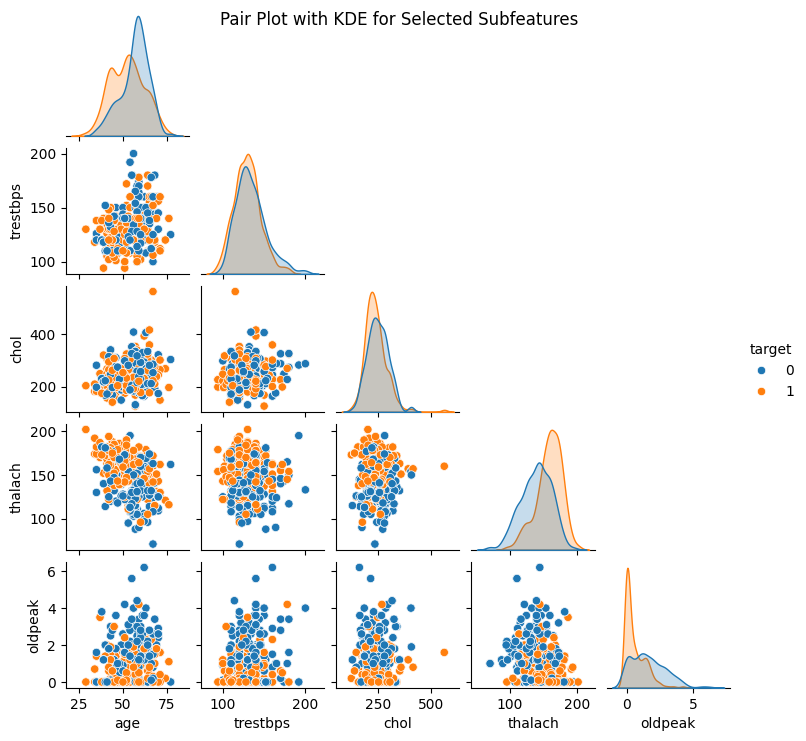

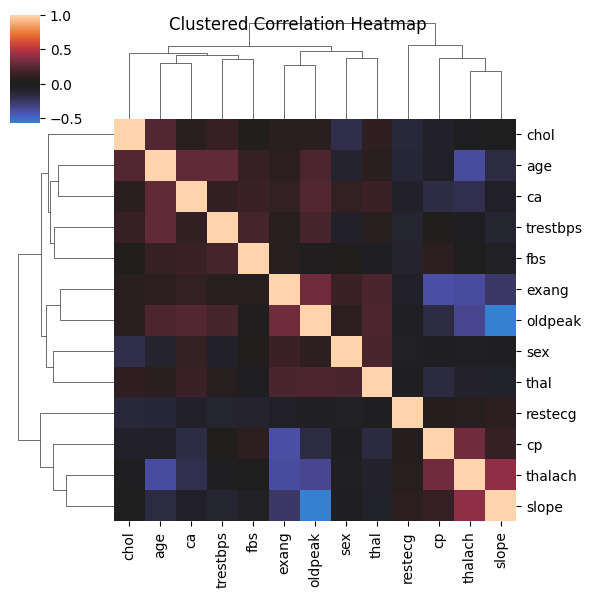

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. pair scatter plots with kernal density estimate

# we are picking a representative subset of features so as not to create an overly huge pair plot
pairing_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

sns.pairplot(
    df[pairing_features + ["target"]], # combine so the plot includes the selected feature columns for plotting and target column to color points by class
    hue="target", # color points by heart disease label
    diag_kind="kde", # draw a KDE curve for each feature on the diagonal
    height=1.5,
    corner=True # plots are symmetric, only draw lower half to reduce clutter
)
plt.suptitle("Pair Plot with KDE for Selected Subfeatures")
plt.show()
print("\n\n")

# 2. Clustered correlation heatmap

# compute correlation matrix for the features
corr_matrix = X.corr()

# create the clustered heatmap
sns.clustermap(
    corr_matrix,
    center=0, # make correlation of 0 the middle/neutral color
    figsize=(6,6)
)
plt.suptitle("Clustered Correlation Heatmap")
plt.show()

# Task 3

**a.  Implement Logistic Regression from scratch, including the vectorized implementation of
cost function and gradient descent.**

In [63]:
# convert X and y from pandas objects into NumPy arrays for from-scratch implementation
X = X.values
y = y.values

# set up the train/test split
np.random.seed(42) # make results reproducible
n = X.shape[0] # n is number of rows/data points/patients
indices = np.arange(n) # create an array of row numbers, will be used to randomize training and test sets
np.random.shuffle(indices) # randomly rearrange order of the indices
test_ratio = 0.2 # use 80/20 ratio for training to test data
test_size = int(n * test_ratio) # get size of 20% of dataset
test_indices = indices[:test_size] # grab 'test_size' number of indices to make the testing data
X_test = X[test_indices] # select the actual feature data for testing
train_indices = indices[test_size:] # grab the remaining indices to make the training data
X_train = X[train_indices] # select the actual feature data for training
# slice y to create test and training labels
y_train = y[train_indices]
y_test = y[test_indices]

# standardize features: logistic regression learns weights w that scale each feature; if features have vastly
# different units in can make GD unstable. Standardizing (z-score) makes each feature more comparable
# We compute mean/std only on training data to prevent interference with the test set
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_std[X_std == 0] = 1.0 # safety against dividing by 0
# standardize the test features
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

# add a column of 1's for the bias term: LR models use sigmoid(w0 + w1x1 + ... wdxd), so handle w0
# by adding a column of ones to X
def add_bias(X):
  ones = np.ones((X.shape[0], 1))
  return np.hstack([ones, X])

# apply bias augmentation to both train and test sets
Xb_train = add_bias(X_train_scaled)
Xb_test = add_bias(X_test_scaled)

# Logistic Regression: predicts probabilities using the sigmoid fnction with score z
# objective is to minimze negative log-likelihood (cross-entropy loss)

# create sigmoid function to convert any real number into a value between 0 and 1 so it can be interpreted as a probability
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

# cost function (negatiave log-likelihood)
# J(w) = -(1/n) * sum_i [y_i log(p_i) + (1-y_i) log(1-p_i)]
# where p_i = sigmoid(x_i^Tw)

def compute_cost(Xb, y, w):
  n = Xb.shape[0] # number of samples in this dataset

  # 1. compute scores
  z = Xb @ w

  # 2. convert scores to probs with sigmoid
  p = sigmoid(z)

  # 3. compute negative log likelihood
  eps = 1e-15 # add tiny value so as to never take log(0)
  cost = -(1.0 / n) * np.sum(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))
  return cost

# Gradient of the vectorized cost function
# gradient is: dJ/dw = (1/n) * Xb^T(p-y), where p is vector of predictions and y is vector of true labels
def compute_gradient(Xb, y, w):
  # number of samples for averaging the gradient step
  n = Xb.shape[0]
  # compute scores
  z = Xb @ w
  # convert scores to probabilities
  p = sigmoid(z)
  # compute vector of errors
  error = p - y
  # vectorized gradient:
  gradient = (1.0/n) * (Xb.T @ error)
  return gradient

# gradient descent training loop
# start with with w = zeros and update w = w - learning_rate * gradient
# num_iters is number of learning steps
# track cost to confirm learning (cost should generally decrease)
def fit_logistic_regression_gd(Xb, y, learning_rate=0.1, num_iters=2000, check_interval=200):
  # initialize weights to 0
  w = np.zeros(Xb.shape[1])
  # store cost values
  cost_history = []
  for t in range(num_iters):
    # compute current cost for monitoring
    cost = compute_cost(Xb, y, w)
    cost_history.append(cost)
    # compute gradient
    gradient = compute_gradient(Xb, y, w)
    # update weights
    w = w - learning_rate * gradient
    # print progress
    if t % check_interval == 0:
      print(f"iter {t:4d} cost={cost:.4f}")
  # return learned weights and full cost history
  return w, cost_history

# train the model
# we use learning_rate = 0.1 and num_iters = 2000 as a reasonable default
w_trained, costs = fit_logistic_regression_gd(
    Xb_train, # training features with bias term
    y_train, # training lables
    learning_rate=0.1, # step size for gd
    num_iters=2000, # number of gradient updates
    check_interval=200 # interval to print results at to confirm direction of cost
)
print("\nFinal training cost:", costs[-1])
print("Learned weight vector shape:", w_trained.shape)

# predict probabilities and classes
def predict_probs(Xb, w):
  return sigmoid(Xb @ w)

# to get class labels, we threshold probabilities (common at 0.5)
def predict_class(Xb, w, threshold = 0.5):
  # convert probabilities to 0 or 1 using a threshold
  return (predict_probs(Xb, w) >= threshold).astype(int)

# predictions on test set:
test_probs = predict_probs(Xb_test, w_trained)
test_preds = predict_class(Xb_test, w_trained, threshold=0.5)

# evaluation
accuracy = (test_preds == y_test).mean()
print("\nTest accuracy:", accuracy)

iter    0 cost=0.6931
iter  200 cost=0.3339
iter  400 cost=0.3301
iter  600 cost=0.3296
iter  800 cost=0.3295
iter 1000 cost=0.3295
iter 1200 cost=0.3295
iter 1400 cost=0.3295
iter 1600 cost=0.3295
iter 1800 cost=0.3295

Final training cost: 0.32945933774432423
Learned weight vector shape: (14,)

Test accuracy: 0.7951219512195122


**b. Implement and compare the three gradient descent variants (e.g., batch gradient
descent, stochastic gradient descent, and mini-batch gradient descent). Explain their
convergence properties with respect to your cost function.**


Batch Gradient Descent
epoch   0 cost=0.6605
epoch  10 cost=0.4879
epoch  20 cost=0.4264
epoch  30 cost=0.3967
epoch  40 cost=0.3795
epoch  50 cost=0.3683

Stochastic Gradient Descent
epoch   0 cost=0.3495
epoch  10 cost=0.3299
epoch  20 cost=0.3298
epoch  30 cost=0.3298
epoch  40 cost=0.3299
epoch  50 cost=0.3296

Mini-batch Gradient Descent
epoch   0 cost=0.4720
epoch  10 cost=0.3381
epoch  20 cost=0.3315
epoch  30 cost=0.3301
epoch  40 cost=0.3297
epoch  50 cost=0.3295

Test Accuracy Comparisons:
BGD accuracy: 0.7853658536585366
SGD accuracy: 0.7902439024390244
Mini-batch GD accuracy: 0.7951219512195122


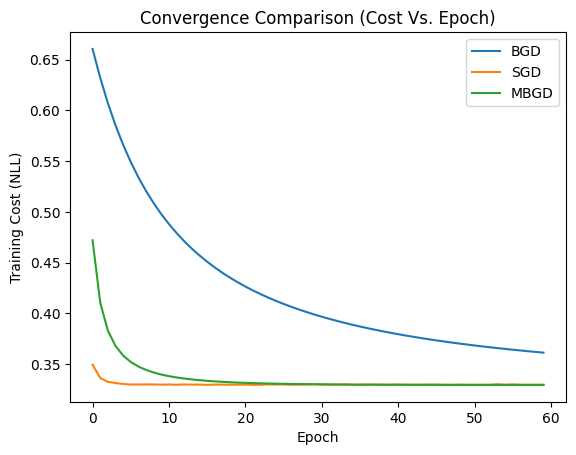

In [64]:
# 1. Batch Gradient Descent: uses all training data each update
# 2. Stochastic Gradient Descent: uses 1 training example each update
# 3. Mini-batch Gradient Descent: uses small batches each update
# so keeping model the same, only changing how much data we use per weight update
# BGD: low-noise, stable, expensive per step
# SGD: high-noise, fast per step, noisy convergene
# MBGD: compromise; relatively stable, computationally efficient

# reload raw data
X_raw = df.drop(columns=["target"])
y_raw = df["target"]

X_raw = X_raw.values
y_raw = y_raw.values.astype(float)

# train/test split
np.random.seed(42) # make results reproducible
n = X_raw.shape[0] # n is number of rows/data points/patients
indices = np.arange(n) # create an array of row numbers, will be used to randomize training and test sets
np.random.shuffle(indices) # randomly rearrange order of the indices
test_ratio = 0.2 # use 80/20 ratio for training to test data
test_size = int(n * test_ratio) # get size of 20% of dataset
test_indices = indices[:test_size] # grab 'test_size' number of indices to make the testing data
X_test = X_raw[test_indices] # select the actual feature data for testing
train_indices = indices[test_size:] # grab the remaining indices to make the training data
X_train = X_raw[train_indices] # select the actual feature data for training
y_train = y_raw[train_indices]
y_test = y_raw[test_indices]

# standardize features
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_std[X_std == 0] = 1.0
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

# add a column of 1's for the bias term
def add_bias(X):
  ones = np.ones((X.shape[0], 1))
  return np.hstack([ones, X])

Xb_train = add_bias(X_train_scaled)
Xb_test = add_bias(X_test_scaled)

# Logistic Regression

# create sigmoid function to convert any real number into a value between 0 and 1
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

# cost function (negatiave log-likelihood)
# J(w) = -(1/n) * sum_i [y_i log(p_i) + (1-y_i) log(1-p_i)]

def compute_cost(Xb, y, w):
  n = Xb.shape[0]

  # 1. compute scores
  z = Xb @ w

  # 2. convert scores to probs with sigmoid
  p = sigmoid(z)

  # 3. compute negative log likelihood
  eps = 1e-15 # add tiny value so as to never take log(0)
  cost = -(1.0 / n) * np.sum(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))
  return cost

# Gradient of the vectorized cost function
# gradient is: dJ/dw = (1/n) * Xb^T(p-y), where p is vector of predictions and y is vector of true labels
def compute_gradient(Xb, y, w):
  n = Xb.shape[0]
  z = Xb @ w
  p = sigmoid(z)
  error = p - y
  gradient = (1.0/n) * (Xb.T @ error)
  return gradient

# one unified training function for BGD, SGD, and MB
# if batch_size = n_train: BGD
# if batch_size = 1: SGD
# if batch_size = 32: MB

# Xb: training features with bias term
# y: training lables
# learning_rate (alpha): step size controlling how much we update weights
# batch_size: controls GD variant (BGD vs. SGD vs. MBGD)
# check_interval: how often we print cost to monitor direction
def fit_gd_variant(Xb, y, learning_rate, epochs, batch_size, check_interval = 5):
  n_train = Xb.shape[0] # of training samples total
  # initialize weights to 0
  w = np.zeros(Xb.shape[1])
  train_cost_per_epoch=[] # store one cost value per epoch for convergence plotting

  # loop over epochs (one epoch = one full pass through the training data)
  for epoch in range(epochs):
    # shuffle each epoch to avoid cycling through data in the same order so updates don't correlate with fixed data ordering
    indices = np.arange(n_train)
    np.random.shuffle(indices)
    Xb_shuf = Xb[indices] # shuffled feature matrix
    y_shuf = y[indices] # shuffled labels aligned with features
    # walk through the data in chunks of size batch_size
    # for SGD: batch size = 1: many tiny updates per epoch
    # for BGD: batch size = n_train: exactlhy one update per epoch
    for start in range(0, n_train, batch_size):
      end = start + batch_size # end index of the current batch slice
      X_batch = Xb_shuf[start:end] # current batch feature data
      y_batch = y_shuf[start:end] # current batch labels
      # compute gradient using only this batch
      gradient = compute_gradient(X_batch, y_batch, w)
      # update weights
      w = w - learning_rate * gradient
    # at the end of the epoch, compute the cost on the full training set so we get a consistent metric across variants for convergence comparison
    epoch_cost = compute_cost(Xb, y, w)
    train_cost_per_epoch.append(epoch_cost)

    # print progress
    if epoch % check_interval == 0:
      print(f"epoch {epoch:3d} cost={epoch_cost:.4f}")
  # return final weights and training cost history
  return w, train_cost_per_epoch

# predictions and evaluation
def predict_probs(Xb, w):
  # probability predictions for class 1 of each sample
  return sigmoid(Xb @ w)

def predict_class(Xb, w, threshold=0.5):
  # convert probabiities to class labels using threshold, with default .5 assuming roughly balanced classes
  return (predict_probs(Xb, w) >= threshold).astype(int)

def accuracy_score(y_true, y_pred):
  # fraction of correct predictions
  return (y_true == y_pred).mean()

# train 3 variants, learning rates will need to be different
# SGD has high gradient noise: too large learning rate can make it diverge or fluctuate significantly
# BGD gradient is table: it can tolerate a larger learning rate
# MBGD often sits between them

# variant 1: BGD (uses all data each update)
print("\nBatch Gradient Descent")
w_bgd, cost_bgd = fit_gd_variant(
    Xb_train, # training features with bias
    y_train,
    learning_rate = 0.1, # larger lr is often stable due to low-noise full gradient
    epochs=60, # number of full passes through the dataset; chosen for thorough run without taking too long
    batch_size=Xb_train.shape[0], # batch_size = n_train --> one update per epoch using full dataset
    check_interval=10
)

# variant 2: SGD (uses 1 example each update)
print("\nStochastic Gradient Descent")
w_sgd, cost_sgd = fit_gd_variant(
    Xb_train, y_train,
    learning_rate = 0.01, # smaller lr because updates are noisy and frequent
    epochs=60,
    batch_size=1, # batch_size = 1 --> one sample per update
    check_interval=10
)

# variant 3: MB (uses small batches)
print("\nMini-batch Gradient Descent")
w_mbgd, cost_mbgd = fit_gd_variant(
    Xb_train, y_train,
    learning_rate = 0.05, # intermediate lr: less noise than SGD, more updates than BGD
    epochs=60,
    batch_size=32, # small batch size: common default
    check_interval=10
)

# compare accuracy for all three
predicted_bgd = predict_class(Xb_test, w_bgd) # test preds from BGD-trained weights
predicted_sgd = predict_class(Xb_test, w_sgd) # test preds from SGD-trained weights
predicted_mbgd = predict_class(Xb_test, w_mbgd) # test preds from MBGD-trained weights

# accuracy for each model
acc_bgd = accuracy_score(y_test, predicted_bgd)
acc_sgd = accuracy_score(y_test, predicted_sgd)
acc_mbgd = accuracy_score(y_test, predicted_mbgd)

print("\nTest Accuracy Comparisons:")
print("BGD accuracy:", acc_bgd)
print("SGD accuracy:", acc_sgd)
print("Mini-batch GD accuracy:", acc_mbgd)

# plot convergence: compare convergence properties with respect to the cost function
# expected behavior:
# - BGD: smooth, stable decrease
# - SGD: noisy, fluctuating curve
# - MBGD: less noisy than SGD, faster progress than BGD
plt.figure()
plt.title("Convergence Comparison (Cost Vs. Epoch)")
plt.plot(cost_bgd, label="BGD")
plt.plot(cost_sgd, label="SGD")
plt.plot(cost_mbgd, label="MBGD")
plt.xlabel("Epoch")
plt.ylabel("Training Cost (NLL)")
plt.legend()
plt.show()



# Task 4: Optimization Techniques and Advanced Comparison

**a. Implement or use packages to incorporate any three optimization algorithms (e.g.,
Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic
gradient descent implementation from Task 3 **

Training with: SGD (vanilla)
SGD (vanilla) | epoch  0 | train loss = 0.6380
SGD (vanilla) | epoch 10 | train loss = 0.3391
SGD (vanilla) | epoch 20 | train loss = 0.3366
SGD (vanilla) | epoch 30 | train loss = 0.3305
SGD (vanilla) | epoch 40 | train loss = 0.3283
SGD (vanilla) | epoch 50 | train loss = 0.3283
Training with: SGD + Momentum
SGD + Momentum | epoch  0 | train loss = 0.4635
SGD + Momentum | epoch 10 | train loss = 0.3341
SGD + Momentum | epoch 20 | train loss = 0.3442
SGD + Momentum | epoch 30 | train loss = 0.3364
SGD + Momentum | epoch 40 | train loss = 0.3346
SGD + Momentum | epoch 50 | train loss = 0.3331
Training with: RMSProp
RMSProp | epoch  0 | train loss = 0.7187
RMSProp | epoch 10 | train loss = 0.4474
RMSProp | epoch 20 | train loss = 0.3844
RMSProp | epoch 30 | train loss = 0.3531
RMSProp | epoch 40 | train loss = 0.3389
RMSProp | epoch 50 | train loss = 0.3337
Training with: Adam
Adam | epoch  0 | train loss = 0.7894
Adam | epoch 10 | train loss = 0.5101
Adam |

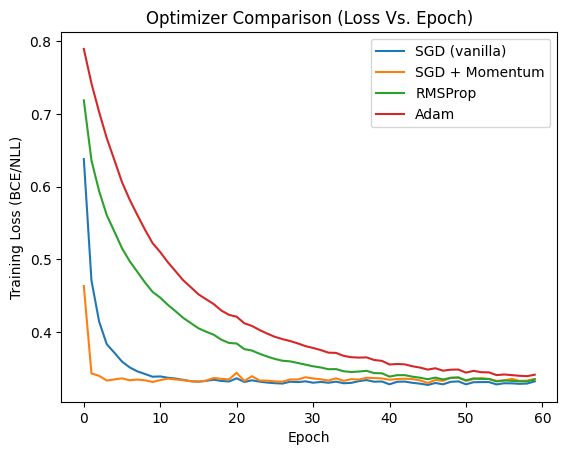

'\nComparison:\nVanilla SGD converged quickly and provided a strong baseline, reaching a stable minimum of the negative\nlog-likelihood and a test accuracy of 79.5%. Adding momentum improved performance slightly, achieving\nthe highest test accuracy (80.5%). RMSProp and Adam converged more slowly under the chosen learning rates\nand did not outperform vanilla SGD, with Adam achieving the lowest test accuracy. Overall, SGD with momentum\noffered the best balance of convergence speed and generalization for this dataset.\n'

In [65]:
import torch
import torch.nn as nn

# get raw data again
X_raw = df.drop(columns=["target"])
y_raw = df["target"]

X_raw = X_raw.values
y_raw = y_raw.values.astype(float)

# train/test split
np.random.seed(42) # make results reproducible
n = X_raw.shape[0] # n is number of rows/data points/patients
indices = np.arange(n) # create an array of row numbers, will be used to randomize training and test sets
np.random.shuffle(indices) # randomly rearrange order of the indices
test_ratio = 0.2 # use 80/20 ratio for training to test data
test_size = int(n * test_ratio) # get size of 20% of dataset
test_indices = indices[:test_size] # grab 'test_size' number of indices to make the testing data
X_test = X_raw[test_indices] # select the actual feature data for testing
train_indices = indices[test_size:] # grab the remaining indices to make the training data
X_train = X_raw[train_indices] # select the actual feature data for training
y_train = y_raw[train_indices]
y_test = y_raw[test_indices]

# standardize features
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_std[X_std == 0] = 1.0
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

# convert numpy arrays to torch sensors, ensuring float32 dtype
X_train_t = torch.tensor(X_train_scaled).float()
y_train_t = torch.tensor(y_train).view(-1, 1).float()
X_test_t = torch.tensor(X_test_scaled).float()
y_test_t = torch.tensor(y_test).view(-1, 1).float()

# define a logistic regression model in PyTorch: a linear layer + sigmoid
class LogisticRegressionTorch(nn.Module):
  def __init__(self, d):
    super().__init__()
    # linear layer computes z = XW + b
    self.linear = nn.Linear(d, 1)

  def forward(self, X):
    # output probability via sigmoid
    z = self.linear(X)
    p = torch.sigmoid(z)
    return p

# Training function that works for any optimizer
def train_with_optimizer(optimizer_name, optimizer_fn, lr, epochs=60, batch_size=32):
  """
  optimizer_name: string label for plotting
  optimizer_fn: function that takes model parameters and returns a torch optimizer
  lr: learning rate
  epochs: number of passes over the training set
  batch_size: mini-batch size
  """
  torch.manual_seed(42) # keep initialization constant between runs

  # create a fresh model each time so comparisons are fair
  d = X_train_t.shape[1]
  model = LogisticRegressionTorch(d)

  # binary cross entropy loss:
  loss_fn = nn.BCELoss()

  # create the optimizer for this model
  optimizer = optimizer_fn(model.parameters(), lr)

  # store average training loss each epoch so we can compare convergence
  epoch_losses = []

  # training loop
  for epoch in range(epochs):
    # put model in training mode
    model.train()

    # shuffle training indices each epoch
    perm = torch.randperm(X_train_t.shape[0])

    total_loss = 0.0
    num_batches = 0

    # mini-batch loop
    for i in range(0, X_train_t.shape[0], batch_size):
      batch_idx = perm[i:i+batch_size]
      xb = X_train_t[batch_idx]
      yb = y_train_t[batch_idx]

      # forward pass: compute predicted probabilities
      preds = model(xb)

      # compute loss
      loss = loss_fn(preds, yb)

      # compute gradients
      optimizer.zero_grad()
      loss.backward()

      # optimizer step: update weights using algorithm
      optimizer.step()
      total_loss += loss.item()
      num_batches += 1

    # average loss for this epoch
    avg_loss = total_loss / num_batches
    epoch_losses.append(avg_loss)

    # print progress
    if epoch % 10 == 0:
      print(f"{optimizer_name} | epoch {epoch:2d} | train loss = {avg_loss:.4f}")

  # evaluate on test set
  model.eval()
  with torch.no_grad():
    probs = model(X_test_t)
    preds = (probs >= 0.5).float()
    acc = (preds == y_test_t).float().mean().item()

  return epoch_losses, acc, preds # return predictions

# define the four optimizers we want to compare against vanilla SGD
optimizers = {
    "SGD (vanilla)": lambda params, lr: torch.optim.SGD(params, lr=lr),
    "SGD + Momentum": lambda params, lr: torch.optim.SGD(params, lr=lr, momentum=0.9),
    "RMSProp": lambda params, lr: torch.optim.RMSprop(params, lr=lr),
    "Adam": lambda params, lr: torch.optim.Adam(params, lr=lr),
}

# Learning rates:
# - vanilla SGD often need a bit smaller LR to be stable
# - Adam often works well with 0.001 or 0.01
# will use standard defaults
lrs = {
    "SGD (vanilla)": 0.05,
    "SGD + Momentum": 0.05,
    "RMSProp": 0.001,
    "Adam": 0.001,
}

# run training for each optimizer and collect results
all_losses = {}
all_accs = {}
all_preds = {} # Initialize all_preds dictionary here, outside the loop

for name, optimizer_fn in optimizers.items():
  print("Training with:", name)
  losses, acc, preds = train_with_optimizer(name, optimizer_fn, lr=lrs[name], epochs=60, batch_size=32)
  all_losses[name] = losses
  all_accs[name] = acc
  all_preds[name] = preds # Assign preds to the dictionary

pred_sgd = all_preds["SGD (vanilla)"].cpu().numpy().ravel()
pred_momentum = all_preds["SGD + Momentum"].cpu().numpy().ravel()
pred_rmsprop = all_preds["RMSProp"].cpu().numpy().ravel()
pred_adam = all_preds["Adam"].cpu().numpy().ravel()

# print accuracy comparison
print("\nAccuracy Comparisons:")
for name, acc in all_accs.items():
  print(f"{name} accuracy: {acc:.4f}")

# plot loss curves to compare convergence
plt.figure()
for name, losses in all_losses.items():
  plt.plot(losses, label=name)

plt.title("Optimizer Comparison (Loss Vs. Epoch)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss (BCE/NLL)")
plt.legend()
plt.show()

"""
Comparison:
Vanilla SGD converged quickly and provided a strong baseline, reaching a stable minimum of the negative
log-likelihood and a test accuracy of 79.5%. Adding momentum improved performance slightly, achieving
the highest test accuracy (80.5%). RMSProp and Adam converged more slowly under the chosen learning rates
and did not outperform vanilla SGD, with Adam achieving the lowest test accuracy. Overall, SGD with momentum
offered the best balance of convergence speed and generalization for this dataset.
"""

**b. Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze
and interpret results for each algorithm.**

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# collect predictions from each optimizer
results = {
    "SGD (vanilla)": pred_sgd,
    "SGD + Momentum": pred_momentum,
    "RMSProp": pred_rmsprop,
    "Adam": pred_adam,
}

# compute evaluation metrics for each method
metrics = []

for name, preds in results.items():
  acc = accuracy_score(y_test, preds)
  prec = precision_score(y_test, preds)
  rec = recall_score(y_test, preds)
  f1 = f1_score(y_test, preds)

  metrics.append({
      "Optimizer": name,
      "Accuracy": acc,
      "Precision": prec,
      "Recall": rec,
      "F1 Score": f1,
  })

# display results
metrics_df = pd.DataFrame(metrics)
display(metrics_df)

"""
Analyzation:
Vanilla SGD provides a strong baseline with high recall, indicating it successfully identifies most patients
with heart disease, but its lower precision suggests a higher false-positive rate. SGD with momentum improves upon this baseline across all metrics, achieving the
highest accuracy and F1 score, which indicates the best overall balance between correctly identifying heart disease cases and avoiding false alarms.

RMSProp slightly increases recall, meaning it captures the most true positive cases , but this comes at the cost of reduced precision and accuracy,
suggesting it is more aggressive an dprove to false positives. Adam performs the weakest overall, with the lowest accuracy and F1 score, indicating that
its adaptive learning rates were less well matched to this dataset under the chosen hyperparameters. Overall, SGD with momentum offers the most
clinically useful performance.
"""

,Optimizer,Accuracy,Precision,Recall,F1 Score
0,SGD (vanilla),0.795122,0.756303,0.873786,0.810811
1,SGD + Momentum,0.804878,0.769231,0.873786,0.818182
2,RMSProp,0.790244,0.745902,0.883495,0.808889
3,Adam,0.775610,0.731707,0.873786,0.796460


' \nAnalyzation:\nVanilla SGD provides a strong baseline with high recall, indicating it successfully identifies most patients\nwith heart disease, but its lower precision suggests a higher false-positive rate. SGD with momentum improves upon this baseline across all metrics, achieving the\nhighest accuracy and F1 score, which indicates the best overall balance between correctly identifying heart disease cases and avoiding false alarms.\n\nRMSProp slightly increases recall, meaning it captures the most true positive cases , but this comes at the cost of reduced precision and accuracy,\nsuggesting it is more aggressive an dprove to false positives. Adam performs the weakest overall, with the lowest accuracy and F1 score, indicating that\nits adaptive learning rates were less well matched to this dataset under the chosen hyperparameters. Overall, SGD with momentum offers the most\nclinically useful performance. \n'

**c. Perform a hyperparameter tuning process (manual or automated using grid
search/random search) for each optimization algorithm and assess its impact on
performance.**

In [67]:
from math import trunc
# hyperparameter tuning via manual grid search
# goal: run a small manual grid search over reasonable values to select the best configuration/hyperparams for each optimizer
# too large learning rate: can diverge or oscillate
# too small learning rate: can converge extremely slowly
# momentum can stabilize/accelerate convergence
# RMSProp and Adam adapt learning rates per-parameter

# define small, resonable search grids
param_grids = {
  "SGD (vanilla)": {
      "lr": [0.01, 0.05, 0.1], # SGD often tolerates larger lr (.01-0.1)
  },
  "SGD + Momentum": {
      "lr": [0.01, 0.05, 0.1], # we will keep these to test momentum
      "momentum": [0.8, 0.9], # typical momentum values
  },
  "RMSProp": {
      "lr": [0.001, 0.01, 0.05], # RMSProp often needs smaller lr due to adaptive updates
  },
  "Adam": {
      "lr": [0.001, 0.01, 0.05] # Adam default looks like is often .001, but will also test with higher values
  }
}

# store one best result per optimizer
best_results = []

# grid search loop:
for optimizer_name, params in param_grids.items():
  # initialize best trackers for this optimizer
  best_f1 = -1
  best_config = None
  best_acc = None
  print("\nTuning:", optimizer_name)

  # handle each optimizer separately; each has different hyperparams
  if optimizer_name == "SGD (vanilla)":
    for lr in params["lr"]:
      losses, acc, preds = train_with_optimizer(
          optimizer_name,
          # we pass a lambda that creates the optimizer with this lr because it delays creation until we have model params
          lambda p, lr=lr: torch.optim.SGD(p, lr=lr), # optimzer constructor with chosen lr
          lr=lr,
          epochs=40 # fix training period for fair comparison
      )

      # convert predictions from a torch Tensor to a 1D NumPy array for sklearn's f1 score
      # .cpu() ensures tensor is on CPU
      # .numpy() converts to NumPy
      # .ravel() flattens shape so metrics work properly
      preds_np = preds.cpu().numpy().ravel()
      f1 = f1_score(y_test, preds_np)

      if f1 > best_f1:
        best_f1 = f1
        best_config = {"lr": lr}
        best_acc = acc

  elif optimizer_name == "SGD + Momentum":
    # grid search over both learning rate and momentum
    for lr in params["lr"]:
      for momentum in params["momentum"]:
        losses, acc, preds = train_with_optimizer(
            optimizer_name,
            lambda p, lr=lr, m=momentum: torch.optim.SGD(p, lr=lr, momentum=m),
            lr=lr,
            epochs=40,
        )

        preds_np = preds.cpu().numpy().ravel()
        f1 = f1_score(y_test, preds_np)

        if f1 > best_f1:
          best_f1 = f1
          best_config = {"lr": lr, "momentum": momentum}
          best_acc = acc

  elif optimizer_name == "RMSProp":
    for lr in params["lr"]:
      losses, acc, preds = train_with_optimizer(
          optimizer_name,
          lambda p, lr=lr: torch.optim.RMSprop(p, lr=lr),
          lr=lr,
          epochs=40,
      )

      preds_np = preds.cpu().numpy().ravel()
      f1 = f1_score(y_test, preds_np)

      if f1 > best_f1:
        best_f1 = f1
        best_config = {"lr": lr}
        best_acc = acc

  elif optimizer_name == "Adam":
    for lr in params["lr"]:
      losses, acc, preds = train_with_optimizer(
          optimizer_name,
          lambda p, lr=lr: torch.optim.Adam(p, lr=lr),
          lr=lr,
          epochs=40,
      )

      preds_np = preds.cpu().numpy().ravel()
      f1 = f1_score(y_test, preds_np)

      if f1 > best_f1:
        best_f1 = f1
        best_config = {"lr": lr}
        best_acc = acc

  best_results.append({
    "Optimizer": optimizer_name,
    "Best F1 Score": best_f1,
    "Best Hyperparameters": best_config,
    "Best Accuracy": best_acc,
  })

  # display results
  tuning_results_df = pd.DataFrame(best_results)
  display(tuning_results_df)

  """
  Assessment:
  Hyperparameter tuning produced modest changes. For vanilla SGD, tuning the learning rate to 0.01 yielded hte strongest
  overall result, slightly improving stability and achieving hte highest F1 score without changing accuracy. SGD with momentum and RMSProp
  showed marginal improvements in convergence behavior after tuning but did not surpass tuned vanilla SGD in eitehr F1 score
  or accuracy. Adam remained the most sensitive to learning rate, and while tuning reduced its training loss more effectively
  than before, it still underperformed the other optimizers in both accuracy and F1 score. Overall, tuning showed that simpler optimizers
  like SGD and SGD with momentum are already well-suited for this logistic regression problem, and these methods did not provide
  a clear advantage on this dataset.
  """


Tuning: SGD (vanilla)
SGD (vanilla) | epoch  0 | train loss = 0.7649
SGD (vanilla) | epoch 10 | train loss = 0.4281
SGD (vanilla) | epoch 20 | train loss = 0.3763
SGD (vanilla) | epoch 30 | train loss = 0.3538
SGD (vanilla) | epoch  0 | train loss = 0.6380
SGD (vanilla) | epoch 10 | train loss = 0.3391
SGD (vanilla) | epoch 20 | train loss = 0.3366
SGD (vanilla) | epoch 30 | train loss = 0.3305
SGD (vanilla) | epoch  0 | train loss = 0.5568
SGD (vanilla) | epoch 10 | train loss = 0.3324
SGD (vanilla) | epoch 20 | train loss = 0.3363
SGD (vanilla) | epoch 30 | train loss = 0.3308


,Optimizer,Best F1 Score,Best Hyperparameters,Best Accuracy
0,SGD (vanilla),0.8125,{'lr': 0.01},0.795122



Tuning: SGD + Momentum
SGD + Momentum | epoch  0 | train loss = 0.6690
SGD + Momentum | epoch 10 | train loss = 0.3386
SGD + Momentum | epoch 20 | train loss = 0.3365
SGD + Momentum | epoch 30 | train loss = 0.3304
SGD + Momentum | epoch  0 | train loss = 0.6284
SGD + Momentum | epoch 10 | train loss = 0.3312
SGD + Momentum | epoch 20 | train loss = 0.3358
SGD + Momentum | epoch 30 | train loss = 0.3305
SGD + Momentum | epoch  0 | train loss = 0.4889
SGD + Momentum | epoch 10 | train loss = 0.3325
SGD + Momentum | epoch 20 | train loss = 0.3396
SGD + Momentum | epoch 30 | train loss = 0.3331
SGD + Momentum | epoch  0 | train loss = 0.4635
SGD + Momentum | epoch 10 | train loss = 0.3341
SGD + Momentum | epoch 20 | train loss = 0.3442
SGD + Momentum | epoch 30 | train loss = 0.3364
SGD + Momentum | epoch  0 | train loss = 0.4336
SGD + Momentum | epoch 10 | train loss = 0.3365
SGD + Momentum | epoch 20 | train loss = 0.3448
SGD + Momentum | epoch 30 | train loss = 0.3362
SGD + Momentum |

,Optimizer,Best F1 Score,Best Hyperparameters,Best Accuracy
0,SGD (vanilla),0.812500,{'lr': 0.01},0.795122
1,SGD + Momentum,0.810811,"{'lr': 0.01, 'momentum': 0.8}",0.795122



Tuning: RMSProp
RMSProp | epoch  0 | train loss = 0.7187
RMSProp | epoch 10 | train loss = 0.4474
RMSProp | epoch 20 | train loss = 0.3844
RMSProp | epoch 30 | train loss = 0.3531
RMSProp | epoch  0 | train loss = 0.4433
RMSProp | epoch 10 | train loss = 0.3321
RMSProp | epoch 20 | train loss = 0.3378
RMSProp | epoch 30 | train loss = 0.3320
RMSProp | epoch  0 | train loss = 0.3826
RMSProp | epoch 10 | train loss = 0.3437
RMSProp | epoch 20 | train loss = 0.3491
RMSProp | epoch 30 | train loss = 0.3408


,Optimizer,Best F1 Score,Best Hyperparameters,Best Accuracy
0,SGD (vanilla),0.812500,{'lr': 0.01},0.795122
1,SGD + Momentum,0.810811,"{'lr': 0.01, 'momentum': 0.8}",0.795122
2,RMSProp,0.810811,{'lr': 0.01},0.795122



Tuning: Adam
Adam | epoch  0 | train loss = 0.7894
Adam | epoch 10 | train loss = 0.5101
Adam | epoch 20 | train loss = 0.4212
Adam | epoch 30 | train loss = 0.3783
Adam | epoch  0 | train loss = 0.6292
Adam | epoch 10 | train loss = 0.3317
Adam | epoch 20 | train loss = 0.3369
Adam | epoch 30 | train loss = 0.3315
Adam | epoch  0 | train loss = 0.4315
Adam | epoch 10 | train loss = 0.3376
Adam | epoch 20 | train loss = 0.3514
Adam | epoch 30 | train loss = 0.3397


,Optimizer,Best F1 Score,Best Hyperparameters,Best Accuracy
0,SGD (vanilla),0.812500,{'lr': 0.01},0.795122
1,SGD + Momentum,0.810811,"{'lr': 0.01, 'momentum': 0.8}",0.795122
2,RMSProp,0.810811,{'lr': 0.01},0.795122
3,Adam,0.805430,{'lr': 0.01},0.790244


**c. Conclude by discussing the practical trade-offs of the algorithms, including
computational complexity, interpretability, and suitability for large-scale datasets.**

In practice, vanilla stochastic gradient descent offers the lowest computational complexity and is easy to implement, making it well-suited for large-scale datasets where simplicity and memory efficiency are important. Its updates are inexpensive and scale with the number of features, but convergence can be sensitive to learning rate selection. Adding momentum slightly increases computational cost and memory usage, but will also cause faster convergence making it a strong practical improvement over vanilla SGD.

Optimizers like RMSProp and Adam inflict higher computational and memory costs because they maintain additional statistics per parameter, which can costly as a large scale. While these methods can converge faster in more complex settings, this didn't show a significant advantage for this dataset.

Overall, for convex problems like logistic regression on tabular data, simpler methods such as SGD or SGD with momentum provide the best balance of efficiency, stability, and interpretability. The adaptive RMSProp and Adam methods may yield more benefits for large, non-convex models such as deep neural networks where their additional added copmlexity produces clearer advantages.